## Assignment 7
Tora Mullings
10/23/22

## Introduction
The dataset we will work with is a set of responses from a survey. It can be found on Kaggle: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey. The description of the dataset from the uploader: "This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace." You can also see the description of each field on this site.
I chose this dataset because it is an important topic in the tech community. Awareness of mental health among those who largely work in technical positions can improve long-term well-being and satisfaction. 

## Data Exploration

In [25]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/djunga/602/main/mental_health_tech_survey.csv')
print(df.shape)
print(df.dtypes)
df.head()


(1259, 27)
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Summary Statistics
The age field's mean, median, 1st, 3rd quartiles, etc.

In [26]:
print(df['Age'].describe())

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


In [22]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

- There are 1259 responses and 27 fields. 
- The only numerical field is `Age`.  (**10. Check whether numeric values are present in a given column of your dataframe.**)
- Only `state` and `work_interfere` have missing values.

## Data Wrangling

- I will create a subset of the data. These are the fields I want to explore more: `Age`,`Gender`,`remote_work`,`tech_company`,`mental_health_consequence`,`coworkers`, `mental_vs_physical`. (**5. Drop column(s) from your dataset.**)
- I will rename some of the fields for consistency.  (**1. Modify multiple column names.**)

In [4]:
df1 = df[['Age', 'Gender', 'remote_work', 'tech_company', 'mental_health_consequence', 'coworkers', 'mental_vs_physical']]  # is_tech_company, is_remote_work
df1 = df1.rename(columns={'Age': 'age', 'Gender': 'gender', 'remote_work':'is_remote_work', 'tech_company':'is_tech_company'})
df1.head()

,age,gender,is_remote_work,is_tech_company,mental_health_consequence,coworkers,mental_vs_physical
0,37,Female,No,Yes,No,Some of them,Yes
1,44,M,No,No,Maybe,No,Don't know
2,32,Male,No,Yes,No,Yes,No
3,31,Male,No,Yes,Yes,Some of them,No
4,31,Male,Yes,Yes,No,Some of them,Don't know


In [5]:
df1['gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

### Altering the Gender Field
For this analysis, we will coerce the gender field to be categorical. Although there is a spectrum of responses for this field, we will reduce it to 'MALE' and 'FEMALE'. (**9. Convert all the string values to upper or lower cases in one column.**)

In [6]:
df2 = df1.loc[df1['gender'].isin(['Male','Female','male','female','M','F','m','f'])]
df2.head()

,age,gender,is_remote_work,is_tech_company,mental_health_consequence,coworkers,mental_vs_physical
0,37,Female,No,Yes,No,Some of them,Yes
1,44,M,No,No,Maybe,No,Don't know
2,32,Male,No,Yes,No,Yes,No
3,31,Male,No,Yes,Yes,Some of them,No
4,31,Male,Yes,Yes,No,Some of them,Don't know


In [7]:
df2[df2['gender'].isin(['Male','male','m','M'])]['gender']

1          M
2       Male
3       Male
4       Male
5       Male
        ... 
1253    Male
1254    male
1255    Male
1256    male
1258    Male
Name: gender, Length: 971, dtype: object

In [8]:
df2.loc[df2['gender'].isin(['Male','male','m','M']), 'gender'] = 'MALE'
df2.loc[df2['gender'].isin(['Female','female','f','F']), 'gender'] = 'FEMALE'
df2['gender'].value_counts()

c:\Users\Tora\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MALE      971
FEMALE    236
Name: gender, dtype: int64

In [9]:
for i in df2.columns:
    print(df2[i].unique())

[   37    44    32    31    33    35    39    42    23    29    36    27
    46    41    34    30    40    38    50    24    18    28    26    22
    19    25    45    21   -29    43    56    60    54   329    55    48
    20    57    58    47    62    51    65    49 -1726     5    53    61
    11    72]
['FEMALE' 'MALE']
['No' 'Yes']
['Yes' 'No']
['No' 'Maybe' 'Yes']
['Some of them' 'No' 'Yes']
['Yes' "Don't know" 'No']


Upon inspecting the remaining fields, I see that all the variables are properly coded.S 
**(2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.)**

We can see that some of the values for age are invalid, like -29 and -1726. We can drop these responses from the dataset.
(**3. Fix missing and invalid values in data. 6. Drop rows from your dataset.**)

In [10]:
df2 = df2.loc[(df2['age'] >= 16) & (df2['age'] <= 100)]

In [11]:
#col_names=['gender', 'is_remote_work',	'is_tech_company', 'mental_health_consequence',	'coworkers', 'mental_vs_physical']
df2.head()

,age,gender,is_remote_work,is_tech_company,mental_health_consequence,coworkers,mental_vs_physical
0,37,FEMALE,No,Yes,No,Some of them,Yes
1,44,MALE,No,No,Maybe,No,Don't know
2,32,MALE,No,Yes,No,Yes,No
3,31,MALE,No,Yes,Yes,Some of them,No
4,31,MALE,Yes,Yes,No,Some of them,Don't know


**(4. Create new columns based on existing columns or calculations.)**

In [12]:
df2.insert(loc=7,
    column='fortyplus_coworkers',
          value=(df2['age']>=40) & (df2['coworkers'] == 'Yes'))

**(8. Filter your data based on some condition.)**

### Sorting the data
I sort the data by age and gender.

**(7. Sort your data based on multiple variables.)**

In [13]:
# sort by age and gender
df2.sort_values(by=['age', 'gender'], inplace=True)
df2.head()

,age,gender,is_remote_work,is_tech_company,mental_health_consequence,coworkers,mental_vs_physical,fortyplus_coworkers
482,18,FEMALE,Yes,Yes,Maybe,Some of them,Don't know,False
43,18,MALE,No,Yes,Yes,No,No,False
118,18,MALE,Yes,Yes,No,Some of them,Don't know,False
282,18,MALE,No,Yes,Yes,No,Don't know,False
287,18,MALE,No,Yes,No,Some of them,Yes,False


### Grouping
I group the data by the field `is_remote_work`. 
**(11. Group your dataset by one coumn, and get the mean, min, and max values by group.)**

In [14]:
print(df2.groupby(['is_remote_work']).agg('mean'))
print(df2.groupby(['is_remote_work']).agg('median'))
print(df2.groupby(['is_remote_work']).agg('min'))
print(df2.groupby(['is_remote_work']).agg('max'))
  

                      age  fortyplus_coworkers
is_remote_work                                
No              31.340426             0.023641
Yes             33.893258             0.039326
                 age  fortyplus_coworkers
is_remote_work                           
No              30.0                  0.0
Yes             33.0                  0.0
                age  gender is_tech_company mental_health_consequence  \
is_remote_work                                                          
No               18  FEMALE              No                     Maybe   
Yes              18  FEMALE              No                     Maybe   

               coworkers mental_vs_physical  fortyplus_coworkers  
is_remote_work                                                    
No                    No         Don't know                False  
Yes                   No         Don't know                False  
                age gender is_tech_company mental_health_consequence  \
is_remote_w

I group by `is_remote_work` and `mental_vs_physical`, and then sort by age.
**(12. Group your dataset by two columns and then sort the aggregated results within the groups.)**

In [15]:
df2.groupby(['is_remote_work', 'mental_vs_physical']).first().sort_values('age')

age  gender is_tech_company  \
is_remote_work mental_vs_physical                                
No             Don't know           18    MALE             Yes   
               No                   18    MALE             Yes   
               Yes                  18    MALE             Yes   
Yes            Don't know           18  FEMALE             Yes   
               No                   19    MALE             Yes   
               Yes                  21    MALE             Yes   

                                  mental_health_consequence     coworkers  \
is_remote_work mental_vs_physical                                           
No             Don't know                               Yes            No   
               No                                       Yes            No   
               Yes                                       No  Some of them   
Yes            Don't know                             Maybe  Some of them   
               No                                        No  Some of them   
               Yes                                       No  Some of them   

                                   fortyplus_coworkers  
is_remote_work mental_vs_physical                       
No             Don't know                        False  
               No                                False  
               Yes                               False  
Yes            Don't know                        False  
               No                                False  
               Yes                               False

## Adding on
I want to see a visualization to better understand the data. I import the seaborn module and make a boxplot for age vs gender. We can see the median age for both male and female is in the 30s. 

[Text(0.5, 1.0, 'Age by Gender')]

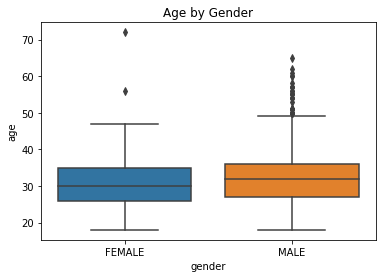

In [17]:
import seaborn as sns

sns.boxplot(data=df2, x='gender', y='age').set(title='Age by Gender')

In [51]:
print(df2.loc[(df2['mental_health_consequence'] == 'No') & (df2['mental_vs_physical'] =='Yes')].shape)
print(df2.loc[(df2['is_remote_work'] =='Yes') & (df2['coworkers'] == 'Yes')].shape)
print(df2.loc[(df2['is_remote_work'] =='Yes') ].shape)
print(df2.loc[(df2['is_remote_work'] =='Yes') & (df2['coworkers'] == 'Yes')].shape)
print(df2.loc[(df2['gender'] =='MALE') & (df2['coworkers'] == 'Yes')].shape)
print(df2.loc[(df2['gender'] =='FEMALE') & (df2['coworkers'] == 'Yes')].shape)      
print(32/236)
print(180/971)

# MALE      971
# FEMALE    236

(226, 8)
(64, 8)
(356, 8)
(77, 8)
(180, 8)
(32, 8)
0.13559322033898305
0.18537590113285274


## Conclusions
After accounting for the alteration of the gender field, we had 971 male and 236 female responses. In all, there were 1207 respondents. Out of these 1207, only 226 responded 'No' to the question *Do you think that discussing a mental health issue with your employer would have negative consequences?*, and 'Yes' to *Do you feel that your employer takes mental health as seriously as physical health?* In other words, 19% respondents feel somewhat comfortable letting their employer know about mental health issues. We would like to see this number increase.
Among the 356 respondents who work remotely, 77 say they feel comfortable discussing mental health with a coworker, vs 64 who do not. Could this mean that people feel more comfortable discussing mental health remotely?  It would be interesting to explore this question further.
With regards to gender, 14% of male respondents feel comfortable discussing mental health with coworkers vs 19% of females. The difference is slight but is worth delving into. Do men have a harder time discussing mental health?
There is much work to be done with regards to socially acceptance of talking about mental health in the workplace. With more time, I would like to explore the factors that impede this acceptance. Also, considering this survey is from 2014, it would also be interesting to see how responses would be different after the COVID-19 pandemic.
